# MNIST Handwritten Digit Classifier - Classify the Odd/Even Number

Given a dataset of 6,000 images of handwritten digits, train a neural network to identify whether the digit is an odd number or an even number.

In [1]:
from keras.datasets import mnist
from keras.preprocessing.image import load_img, array_to_img
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Load and split data into training and test sets.

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


Prepare features and target for training.

In [4]:
image_height,image_width = 28, 28

X_train = X_train.reshape(60000, image_height*image_width)
X_test = X_test.reshape(10000, image_height*image_width)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255.0
X_test /= 255.0

print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [5]:
y_train = y_train % 2
y_test = y_test % 2

print(y_train.shape)
print(y_test.shape)

(60000,)
(10000,)


Train a neural network with 2 hidden layers of 64 nodes each.

In [6]:
model = Sequential()

In [7]:
model.add(Dense(16, activation='relu', input_shape=(784,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [8]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                12560     
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 12,849
Trainable params: 12,849
Non-trainable params: 0
_________________________________________________________________


In [10]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1585 - accuracy: 0.9413 - val_loss: 0.0925 - val_accuracy: 0.9687
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0844 - accuracy: 0.9699 - val_loss: 0.0765 - val_accuracy: 0.9734
Epoch 3/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0692 - accuracy: 0.9756 - val_loss: 0.0665 - val_accuracy: 0.9774
Epoch 4/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0593 - accuracy: 0.9788 - val_loss: 0.0599 - val_accuracy: 0.9797
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0523 - accuracy: 0.9818 - val_loss: 0.0563 - val_accuracy: 0.9802
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0468 - accuracy: 0.9832 - val_loss: 0.0573 - val_accuracy: 0.9803
Epoch 7/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0440 - accuracy: 0.9845 - val_loss: 0.0557 - val_accuracy:

Evaluate the model performance.

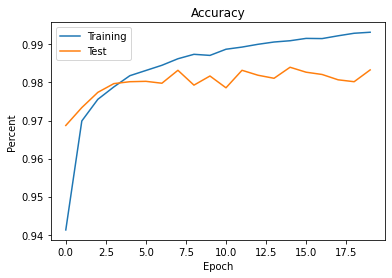

In [11]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.xlabel('Epoch')
plt.ylabel('Percent')
plt.title('Accuracy')
plt.legend(['Training', 'Test'])

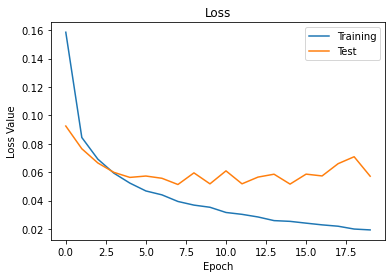

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.xlabel('Epoch')
plt.ylabel('Loss Value')
plt.title('Loss')
plt.legend(['Training', 'Test'])

In [13]:
score = model.evaluate(X_test, y_test)
score

313/313 [==============================] - 0s 1ms/step - loss: 0.0571 - accuracy: 0.9833


[0.05714309588074684, 0.983299970626831]